# **df2 - Real Model training**

# **Customer Feedback & Sentiment Dataset**

In [ ]:
########################################################################

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sbhatti/financial-sentiment-analysis")

print("Path to dataset files:", path)

100%|██████████| 276k/276k [00:00<00:00, 66.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sbhatti/financial-sentiment-analysis/versions/4


In [ ]:
import pandas as pd

In [ ]:
df2=pd.read_csv('/content/Task2_InsuranceReviews.csv')
df2.head()

Review_ID                           Customer_ID  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  23b8c1e9-3924-46de-beb1-3b9046685257   
1  c37459ee-f50b-4a63-b71e-cd7b27cd8130  6142ea7d-17be-4111-9a2a-73ed562b0f79   
2  47294739-614f-43d7-99db-3ad0ddd1dfb2  5d65a441-d588-42de-a2bc-372f7412b293   
3  9132b63e-f162-47e4-a9c3-49e03602f8ac  366eb16f-508e-4ad7-b7c9-3acfe059a0ee   
4  4b22d308-1c8e-4ee9-9715-bd6fa4161293  00d4af59-7427-4ca3-a87d-06ca6f4cc69a   

                                         Review_Text Sentiment_Label  Rating  \
0  Frustrating worst bad slow bad terrible unhelp...        Negative       1   
1  Slow slow terrible bad slow bad worst bad terr...        Negative       2   
2  Slow terrible terrible worst unhelpful unhelpf...        Negative       1   
3  Decent neutral decent average average fine ave...         Neutral       3   
4  Worst frustrating unhelpful bad unhelpful wors...        Negative       1   

       Service_Type  
0  Customer Support  
1  Customer Support  
2             Claim  
3             Claim  
4  Customer Support

# **1) Missing Values**

In [ ]:
df2.isnull().sum()

Review_ID          0
Customer_ID        0
Review_Text        0
Sentiment_Label    0
Rating             0
Service_Type       0
dtype: int64

In [ ]:
df2.nunique()

Review_ID          1000
Customer_ID        1000
Review_Text        1000
Sentiment_Label       3
Rating                5
Service_Type          3
dtype: int64

# **2) Text Cleaning & Tokenization**

# **i) Taken Sentence Column for Text Classification**

In [ ]:
df2['Review_Text'].head()

0    Frustrating worst bad slow bad terrible unhelp...
1    Slow slow terrible bad slow bad worst bad terr...
2    Slow terrible terrible worst unhelpful unhelpf...
3    Decent neutral decent average average fine ave...
4    Worst frustrating unhelpful bad unhelpful wors...
Name: Review_Text, dtype: object

# **ii ) Stopwords Removal, Punctuation Removal, Lowercasing**

# **NLTK (Natural Language Toolkit):**

In [ ]:
# Step 1: Uninstall NLTK and delete its data entirely
!pip uninstall -y nltk
!rm -rf /root/nltk_data
!rm -rf /usr/local/nltk_data

# Step 2: Reinstall a stable version of NLTK
!pip install nltk==3.8.1  # Pin to a stable version

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Load dataset
df2 = pd.read_csv('/content/Task2_InsuranceReviews.csv')

# Get stopwords list
stop_words = set(stopwords.words('english'))

# Define function for preprocessing with POS tagging
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Remove stopwords & punctuation

    pos_tags = pos_tag(words)  # Get POS tags

    # Keep only Nouns (NN), Verbs (VB), Adjectives (JJ), and Adverbs (RB)
    filtered_words = [word for word, tag in pos_tags if tag.startswith(('NN', 'VB', 'JJ', 'RB'))]

    return ' '.join(filtered_words)  # Return cleaned text

# Apply preprocessing function to 'Sentence' column
df2['Cleaned_Review'] = df2['Review_Text'].astype(str).apply(preprocess_text)

# Display processed dataframe
print(df2.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


                              Review_ID                           Customer_ID  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  23b8c1e9-3924-46de-beb1-3b9046685257   
1  c37459ee-f50b-4a63-b71e-cd7b27cd8130  6142ea7d-17be-4111-9a2a-73ed562b0f79   
2  47294739-614f-43d7-99db-3ad0ddd1dfb2  5d65a441-d588-42de-a2bc-372f7412b293   
3  9132b63e-f162-47e4-a9c3-49e03602f8ac  366eb16f-508e-4ad7-b7c9-3acfe059a0ee   
4  4b22d308-1c8e-4ee9-9715-bd6fa4161293  00d4af59-7427-4ca3-a87d-06ca6f4cc69a   

                                         Review_Text Sentiment_Label  Rating  \
0  Frustrating worst bad slow bad terrible unhelp...        Negative       1   
1  Slow slow terrible bad slow bad worst bad terr...        Negative       2   
2  Slow terrible terrible worst unhelpful unhelpf...        Negative       1   
3  Decent neutral decent average average fine ave...         Neutral       3   
4  Worst frustrating unhelpful bad unhelpful wors...        Negative       1   

       Service_Type             

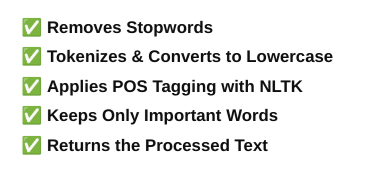

In [ ]:
df2.head()

Review_ID                           Customer_ID  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  23b8c1e9-3924-46de-beb1-3b9046685257   
1  c37459ee-f50b-4a63-b71e-cd7b27cd8130  6142ea7d-17be-4111-9a2a-73ed562b0f79   
2  47294739-614f-43d7-99db-3ad0ddd1dfb2  5d65a441-d588-42de-a2bc-372f7412b293   
3  9132b63e-f162-47e4-a9c3-49e03602f8ac  366eb16f-508e-4ad7-b7c9-3acfe059a0ee   
4  4b22d308-1c8e-4ee9-9715-bd6fa4161293  00d4af59-7427-4ca3-a87d-06ca6f4cc69a   

                                         Review_Text Sentiment_Label  Rating  \
0  Frustrating worst bad slow bad terrible unhelp...        Negative       1   
1  Slow slow terrible bad slow bad worst bad terr...        Negative       2   
2  Slow terrible terrible worst unhelpful unhelpf...        Negative       1   
3  Decent neutral decent average average fine ave...         Neutral       3   
4  Worst frustrating unhelpful bad unhelpful wors...        Negative       1   

       Service_Type                                     Cleaned_Review  
0  Customer Support  frustrating worst bad slow bad terrible unhelp...  
1  Customer Support  slow slow terrible bad slow bad worst bad terr...  
2             Claim  slow terrible terrible worst unhelpful unhelpf...  
3             Claim  decent neutral decent average average fine ave...  
4  Customer Support  worst frustrating unhelpful bad unhelpful wors...

# **Lematize no need if Using BERT Embedding**

# **Because BERT already handles word variations**

In [ ]:
df2.to_csv('task2_new_real_df2_preprocessed.csv')

# **1 ) Feature Extraction**

# **Vectorization**

# **am using BERT embeddings only because its cover entire sentence to give best accuracy and prediction**

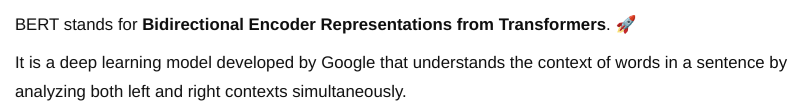

In [ ]:
from transformers import BertTokenizer, BertModel
import torch  # Required for tensor operations

# 3. BERT Embeddings
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    outputs = bert_model(**inputs)
    last_hidden_state = outputs.last_hidden_state
    return list(last_hidden_state.mean(dim=1).detach().numpy()[0])

df2['BERT_Embedding'] = df2['Cleaned_Review'].apply(get_bert_embedding)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

# **return_tensors='pt' - Mean by PyTorch**

In [ ]:
df2.head()

Review_ID                           Customer_ID  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  23b8c1e9-3924-46de-beb1-3b9046685257   
1  c37459ee-f50b-4a63-b71e-cd7b27cd8130  6142ea7d-17be-4111-9a2a-73ed562b0f79   
2  47294739-614f-43d7-99db-3ad0ddd1dfb2  5d65a441-d588-42de-a2bc-372f7412b293   
3  9132b63e-f162-47e4-a9c3-49e03602f8ac  366eb16f-508e-4ad7-b7c9-3acfe059a0ee   
4  4b22d308-1c8e-4ee9-9715-bd6fa4161293  00d4af59-7427-4ca3-a87d-06ca6f4cc69a   

                                         Review_Text Sentiment_Label  Rating  \
0  Frustrating worst bad slow bad terrible unhelp...        Negative       1   
1  Slow slow terrible bad slow bad worst bad terr...        Negative       2   
2  Slow terrible terrible worst unhelpful unhelpf...        Negative       1   
3  Decent neutral decent average average fine ave...         Neutral       3   
4  Worst frustrating unhelpful bad unhelpful wors...        Negative       1   

       Service_Type                                     Cleaned_Review  \
0  Customer Support  frustrating worst bad slow bad terrible unhelp...   
1  Customer Support  slow slow terrible bad slow bad worst bad terr...   
2             Claim  slow terrible terrible worst unhelpful unhelpf...   
3             Claim  decent neutral decent average average fine ave...   
4  Customer Support  worst frustrating unhelpful bad unhelpful wors...   

                                      BERT_Embedding  
0  [-0.35103706, -0.12343027, 0.2449659, -0.10659...  
1  [-0.40734977, 0.10182571, 0.14319761, -0.17414...  
2  [-0.46671802, -0.02883402, 0.15714276, -0.0746...  
3  [0.31474325, 0.24390219, 0.2587983, -0.1611338...  
4  [-0.54733455, -0.010435233, 0.34312895, -0.083...

In [ ]:
df2.to_csv('task2_new_real_df2_bert.csv')

In [ ]:
########################################################################

In [ ]:
df2_new=pd.read_csv('task2_new_real_df2_bert.csv')

In [ ]:
df2_new.head()

Unnamed: 0                             Review_ID  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   
1           1  c37459ee-f50b-4a63-b71e-cd7b27cd8130   
2           2  47294739-614f-43d7-99db-3ad0ddd1dfb2   
3           3  9132b63e-f162-47e4-a9c3-49e03602f8ac   
4           4  4b22d308-1c8e-4ee9-9715-bd6fa4161293   

                            Customer_ID  \
0  23b8c1e9-3924-46de-beb1-3b9046685257   
1  6142ea7d-17be-4111-9a2a-73ed562b0f79   
2  5d65a441-d588-42de-a2bc-372f7412b293   
3  366eb16f-508e-4ad7-b7c9-3acfe059a0ee   
4  00d4af59-7427-4ca3-a87d-06ca6f4cc69a   

                                         Review_Text Sentiment_Label  Rating  \
0  Frustrating worst bad slow bad terrible unhelp...        Negative       1   
1  Slow slow terrible bad slow bad worst bad terr...        Negative       2   
2  Slow terrible terrible worst unhelpful unhelpf...        Negative       1   
3  Decent neutral decent average average fine ave...         Neutral       3   
4  Worst frustrating unhelpful bad unhelpful wors...        Negative       1   

       Service_Type                                     Cleaned_Review  \
0  Customer Support  frustrating worst bad slow bad terrible unhelp...   
1  Customer Support  slow slow terrible bad slow bad worst bad terr...   
2             Claim  slow terrible terrible worst unhelpful unhelpf...   
3             Claim  decent neutral decent average average fine ave...   
4  Customer Support  worst frustrating unhelpful bad unhelpful wors...   

                                      BERT_Embedding  
0  [np.float32(-0.35103706), np.float32(-0.123430...  
1  [np.float32(-0.40734977), np.float32(0.1018257...  
2  [np.float32(-0.46671802), np.float32(-0.028834...  
3  [np.float32(0.31474325), np.float32(0.24390219...  
4  [np.float32(-0.54733455), np.float32(-0.010435...

In [ ]:
import numpy as np
import re

def extract_floats(embedding_str):
    # Extract all float numbers from the string
    float_values = re.findall(r"-?\d+\.\d+", embedding_str)
    return np.array(float_values, dtype=np.float32)  # Convert to NumPy array

# Apply transformation only if the column is in string format
df2_new['BERT_Embedding'] = df2_new['BERT_Embedding'].apply(lambda x: extract_floats(x) if isinstance(x, str) else np.array(x, dtype=np.float32))

print(df2_new['BERT_Embedding'].head())  # Verify conversion


0    [-0.35103706, -0.12343027, 0.2449659, -0.10659...
1    [-0.40734977, 0.10182571, 0.14319761, -0.17414...
2    [-0.46671802, -0.02883402, 0.15714276, -0.0746...
3    [0.31474325, 0.24390219, 0.2587983, -0.1611338...
4    [-0.54733455, -0.010435233, 0.34312895, -0.083...
Name: BERT_Embedding, dtype: object


In [ ]:
print(df2_new['BERT_Embedding'].dtype)
print(df2_new['BERT_Embedding'].head())

object
0    [-0.35103706, -0.12343027, 0.2449659, -0.10659...
1    [-0.40734977, 0.10182571, 0.14319761, -0.17414...
2    [-0.46671802, -0.02883402, 0.15714276, -0.0746...
3    [0.31474325, 0.24390219, 0.2587983, -0.1611338...
4    [-0.54733455, -0.010435233, 0.34312895, -0.083...
Name: BERT_Embedding, dtype: object


In [ ]:
print(type(df2_new['BERT_Embedding'].iloc[0]))  # Check the type of one row

<class 'numpy.ndarray'>


In [ ]:
df2_new['BERT_Embedding'] = df2_new['BERT_Embedding'].apply(lambda x: x.tolist())

In [ ]:
print(type(df2_new['BERT_Embedding'].iloc[0]))  # Check the type of one row

<class 'list'>


In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import joblib

# Make sure embeddings are all proper lists
bert_df = pd.DataFrame(df2_new['BERT_Embedding'].tolist(), index=df2.index)

# Apply SVD
svd = TruncatedSVD(n_components=50)
bert_reduced = svd.fit_transform(bert_df)

# Add reduced embeddings back to the DataFrame
df2_new['BERT_Embedding'] = list(bert_reduced)

# Save the SVD model
joblib.dump(svd, 'task2_real_svd_model.pkl')
print("SVD model saved successfully!")


SVD model saved successfully!


In [ ]:
############################################################################################################

In [ ]:
df2_new['BERT_Embedding']

0      [-7.544582708676531, 3.31636530951367, 2.56899...
1      [-8.549484312891309, 2.427781671197856, 2.4456...
2      [-7.734889793734048, 3.492049997441974, 2.6541...
3      [-9.769008797396847, -6.349023046508501, 1.951...
4      [-7.854489509808467, 3.4300682497179986, 2.754...
                             ...                        
995    [-9.166327439520712, -6.326407584158647, 1.875...
996    [-7.459316957565736, 3.835503080716708, 2.6769...
997    [-8.334188059294405, 3.512034067180354, 2.4791...
998    [-9.57622262260736, -5.144401859515734, 2.1402...
999    [-9.788970027769277, -6.072105717866036, 2.431...
Name: BERT_Embedding, Length: 1000, dtype: object

In [ ]:
feature = df2_new['BERT_Embedding']
target = df2_new['Sentiment_Label']

In [ ]:
df2_new.shape

(1000, 9)

In [ ]:
feature.shape

(1000,)

In [ ]:
import numpy as np

# Convert the embeddings into a 2D numpy array
X = np.array([np.array(embedding, dtype=np.float32) for embedding in feature])  # Stacks the list of embeddings into a proper 2D array
y = target

# Now your features are properly shaped for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        88
     Neutral       1.00      1.00      1.00        48
    Positive       1.00      1.00      1.00        64

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
import joblib

In [ ]:
# Assuming you have the trained RandomForestClassifier
joblib.dump(rf_classifier, '/content/rfclassify.pkl')  # Save the actual model
print("Model saved successfully!")


Model saved successfully!


In [ ]:
import joblib

model_path = "/content/rfclassify.pkl"

# Try loading the model
try:
    model = joblib.load(model_path)
    print(f"Loaded object type: {type(model)}")
except Exception as e:
    print(f"Error loading model: {e}")


Loaded object type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
rf_classifier_loaded

RandomForestClassifier(random_state=42)

In [ ]:
print(f"SVD output shape: {bert_embedding_reduced.shape}")  # Should be (1, 50)

SVD output shape: (1, 50)


In [ ]:
import joblib
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import TruncatedSVD

# Load models
rf_classifier_loaded = joblib.load('/content/rfclassify.pkl')
bert_model = SentenceTransformer('all-MiniLM-L6-v2')  # Use a valid SentenceTransformer model
svd = joblib.load('/content/task2_real_svd_model.pkl')

print("All models loaded successfully!")

# Convert user input to BERT embedding
def get_bert_embedding(sentence):
    return bert_model.encode(sentence)

user_sentence = 'this product is superb'
bert_embedding = get_bert_embedding(user_sentence)

# Convert to DataFrame and apply SVD
bert_embedding_df = pd.DataFrame([bert_embedding])
bert_embedding_reduced = svd.transform(bert_embedding_df)

# Check SVD output shape
print(f"SVD output shape: {bert_embedding_reduced.shape}")  # Must be (1, 50)

# Create DataFrame with 50 features
new_data = pd.DataFrame(bert_embedding_reduced)

# Predict class probabilities and class
class_probabilities = rf_classifier_loaded.predict_proba(new_data)
predicted_class = rf_classifier_loaded.predict(new_data)[0]

# Print raw prediction
print(f"Raw predicted class: {predicted_class} (Type: {type(predicted_class)})")

# Fix mapping for string output
class_labels = {
    "Negative": "Negative review",
    "Neutral": "Neutral review",
    "Positive": "Positive review"
}

# Display the result
print(f"\nPredicted class: {predicted_class} ({class_labels[predicted_class]})")
print(f"Class probabilities: {class_probabilities}")


All models loaded successfully!


ValueError: X has 384 features, but TruncatedSVD is expecting 768 features as input.

In [ ]:
# Get user input
user_text = input("Enter your text: ")

# Convert user input into BERT embedding
user_embedding = get_bert_embedding(user_text).reshape(1, -1)  # Reshape for prediction
print(user_embedding)
new_data = np.array([[user_embedding]]),
# Predict using trained model
prediction = rf_classifier.predict(user_embedding)  # Change to `regressor.predict()` if regression

# Output the result
print("Predicted Output:", prediction)

Enter your text: frustrating worst bad slow bad terrible unhelp
[[ 1.73751973e-02 -5.28852362e-03 -1.83375906e-02 -1.37119358e-02
  -6.28819177e-03  9.00509506e-02 -5.72918020e-02  2.29283646e-02
  -6.37737941e-03 -1.91507861e-02  5.70838563e-02  6.96401745e-02
  -5.41233132e-03 -3.94146889e-03 -7.38816187e-02 -6.37466609e-02
   9.76240914e-03  2.12788396e-02 -4.25802134e-02 -1.98196732e-02
  -9.17395391e-03  5.17205009e-03 -1.07033213e-03  3.66613716e-02
   3.94270243e-03 -6.43617362e-02  5.10080121e-02  6.16524194e-04
  -3.75387818e-02 -2.30632499e-02  2.75174249e-02 -1.09899687e-02
  -5.11826240e-02  4.51093912e-02  2.13625572e-06 -1.81631688e-02
   1.54614327e-02  3.21798143e-03 -7.13304505e-02  5.53353466e-02
  -5.46171097e-03 -1.54340621e-02  4.11249883e-02  5.89209348e-02
  -1.81271564e-02 -3.37386169e-02  1.37378331e-02  2.02955846e-02
   1.12486910e-02  9.94525384e-03  1.06988568e-02  1.64284725e-02
  -6.57371134e-02 -4.56751920e-02  4.62482423e-02 -7.23487362e-02
  -5.2316945

In [ ]:
###############################################################################

In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import joblib

# Make sure embeddings are all proper lists
bert_df = pd.DataFrame(df2['BERT_Embedding'].tolist(), index=df2.index)

# Apply SVD
svd = TruncatedSVD(n_components=50)
bert_reduced = svd.fit_transform(bert_df)

# Add reduced embeddings back to the DataFrame
df2['BERT_Embedding'] = list(bert_reduced)

# Save the SVD model
joblib.dump(svd, 'new_real_svd_model.pkl')
print("SVD model saved successfully!")


SVD model saved successfully!


In [ ]:
import numpy as np
print(np.array(df2['BERT_Embedding'].tolist()).shape)  # Should show (num_samples, 768)


(5842, 50)


# **For quick, efficient modeling:**

Use BERT_Embedding (1D) — it’s lightweight and still captures most of the information.

# **For better performance:**

Use BERT_0 to BERT_49 (50D) — they provide richer representations and will likely improve accuracy.

# **Combining embeddings and structured data:**

Add Rating and Service_Type after encoding them to give your model more context.

In [ ]:
df2['BERT_Embedding'].head()

0    [-6.9515753, -1.8642232, 0.90039194, -1.584456...
1    [-6.3775625, -1.0289946, -1.6640584, -0.092544...
2    [-7.5323906, 2.53632, 1.0446013, 0.9229842, -0...
3    [-6.8794355, -1.48928, 0.62784934, 1.1902752, ...
4    [-8.075133, 0.63730234, 1.1385529, 1.4809669, ...
Name: BERT_Embedding, dtype: object

In [ ]:
df2.to_csv('new_real_df2_bert_embeded.csv')